#Decision Trees

Decision trees are also implmented in scikit-learn. Let's use DecisionTreeClassifier.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 1.000
Test set score: 0.937


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 0.988
Test set score: 0.951


If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. In the above code, we didn't set max_depth (i.e., max_depth= None,  which is the default value). Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split instances (min_samples_split is another parameter in DecisionTreeClassifier). Now let's set max_depth=4, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:

We can visualize the tree using the export_graphviz function from the tree module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

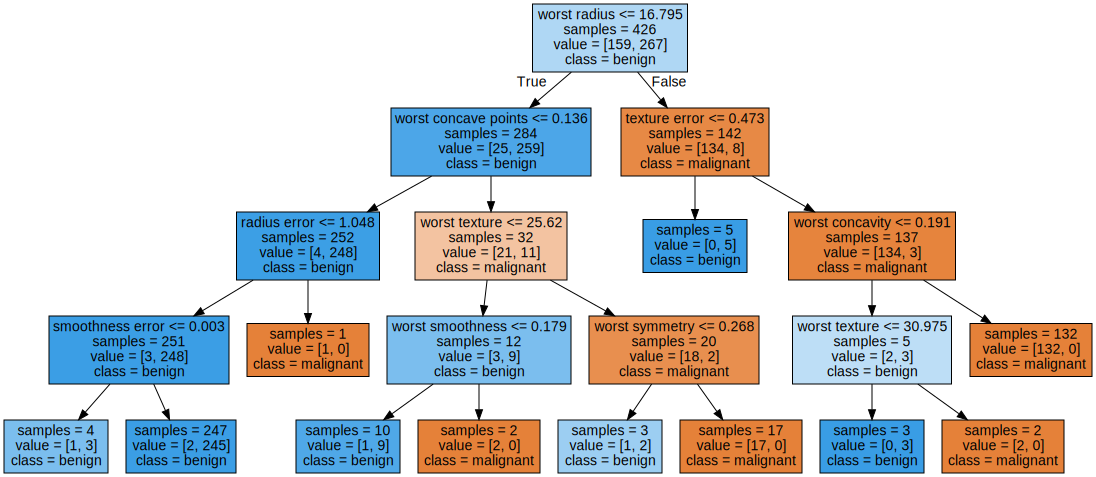

In [4]:
import graphviz
from IPython.display import display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))